<a href="https://colab.research.google.com/github/Helazr/coursera-test/blob/main/diabetproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Mining diabetes patients’ data**

## Import librairies

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Analysis and Visualization



**Load dataset**

In [ ]:
dataset = pd.read_csv("/content/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Number of rows and columns**

In [ ]:
dataset.shape

(768, 9)

**The number of people with diabetes**

In [ ]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Distribution of Glucose Level in the dataset after data cleansing**

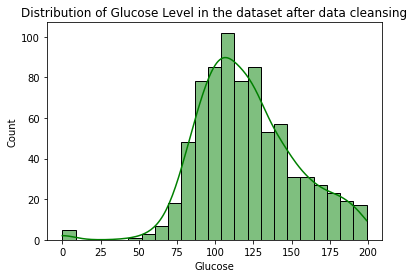

In [ ]:
sns.histplot(dataset, x='Glucose', kde=True, color='g')
plt.title('Distribution of Glucose Level in the dataset after data cleansing')
plt.show()

**Distribution of Blood pressure in the dataset after data cleansing**

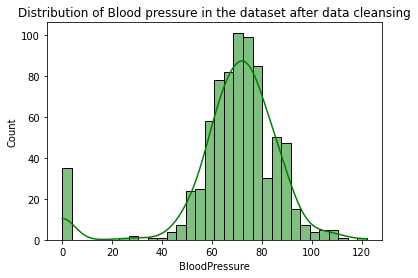

In [ ]:
sns.histplot(dataset, x='BloodPressure', kde=True, color = 'g')
plt.title('Distribution of Blood pressure in the dataset after data cleansing')
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**dataset statistics**

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Clean data** 

**Columns**

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Checking Null values**

In [ ]:
dataset.isnull().sum()*100/dataset.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

**Replace all None element in dataset with '0'**

In [ ]:
dataset.fillna(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Replace all NaN elements in column 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', with 0, 1, 2,3,4,5,6 and 7 respectively.**

In [ ]:
values = {"Pregnancies": 1, "Glucose":2, "BloodPressure": 2, "SkinThickness": 3, "Insulin": 4,
       "BMI": 5, "DiabetesPedigreeFunction": 6, "Age": 7}
dataset.fillna(value=values)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### **Data Preprocessing**

**split data feature and target**

In [ ]:
X = dataset.drop('Outcome', axis=1)
print(X.shape)

(768, 8)


In [ ]:
y = dataset.drop(X, axis=1)
print(y.shape)

(768, 1)


**Split data as train and test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614, 1)
(154, 8)
(154, 1)


**Building DNN model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential() 
#input layer
model.add(Dense(256,  activation = 'relu' ,input_shape=([8])))
# Disable 10% of the neurons on each iteration
Dropout(0.1)
# Adding the second hidden layer (with dropout)
model.add(Dense(256,  activation = 'relu'))
# Disable 10% of the neurons on each iteration
Dropout(0.1)
# Adding the output layer
model.add(Dense(1,activation = 'softmax'))#probabilite

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68,353
Trainable params: 68,353
Non-trainable params: 0
_________________________________________________________________


**Compile model**

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy'])

**convert X8train y_train to array**

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

**Fitting DNN to the Training set**

In [ ]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.4033 - accuracy: 0.3599
Epoch 2/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.3731 - accuracy: 0.3599
Epoch 3/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.3795 - accuracy: 0.3599
Epoch 4/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.3599
Epoch 5/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.3599
Epoch 6/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.3888 - accuracy: 0.3599
Epoch 7/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.3858 - accuracy: 0.3599
Epoch 8/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.3787 - accuracy: 0.3599
Epoch 9/1000
20/20 [==============================] - 0s 8ms/step - loss: 0.3715 - accuracy: 0.3599
Epoch 10/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.3745 - accuracy: 0.3599

**summarize history for accuracy and loss function**

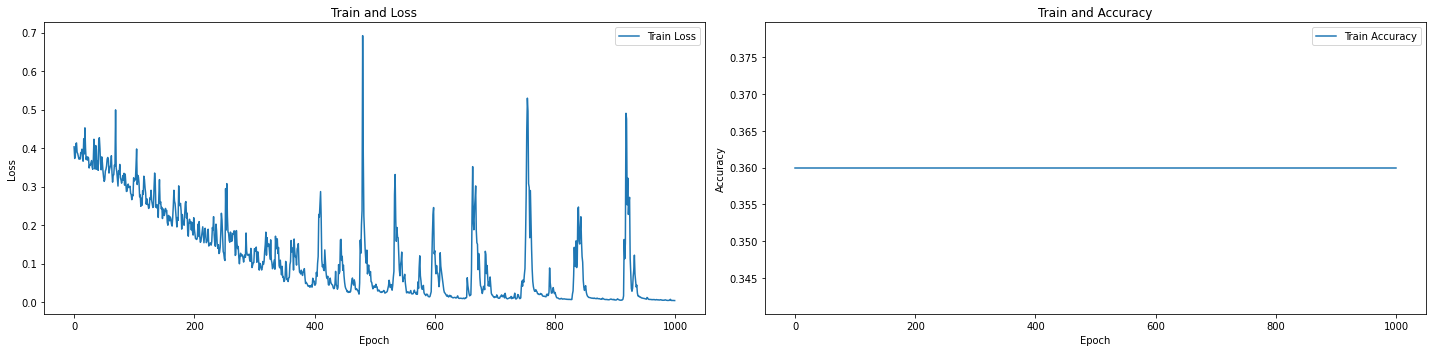

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.legend()
plt.tight_layout()

**Predict for the first 10 Observations**

In [ ]:
pred=model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 79ms/step
[[0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [1.        ]
 [1.        ]]
